In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Survived = train_df['Survived']
train_df = train_df.drop(['Survived'], axis=1)

In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_idx = train_df['PassengerId']
test_idx = test_df['PassengerId']

print('Train shape:', train_df.shape)
print('Test shape:', test_df.shape)

Train shape: (891, 11)
Test shape: (418, 11)


In [7]:
combined_df = pd.concat([train_df, test_df]).reset_index(drop=True)
print(combined_df.shape)
combined_df.head()

(1309, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# preprocess the null values 

In [8]:
print("NULL VALUES:")
print(combined_df.isnull().sum())

NULL VALUES:
PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


## remove nulls from Age

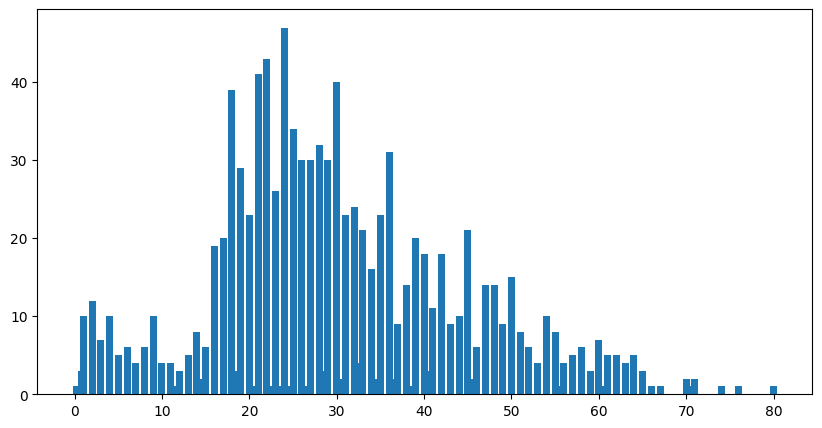

In [9]:
y = combined_df['Age'].value_counts()
X = y.index.values

plt.figure(figsize=(10, 5))
plt.bar(X, y)
plt.show()

In [10]:
# find the median age for each pclass 
age_by_pclass = combined_df.groupby('Pclass')['Age'].median()
print(age_by_pclass)

# fill the missing age values with the median age of the pclass
combined_df['Age'] = combined_df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64


## fill null for fare

In [11]:
print("NULL VALUES:")
print(combined_df.isnull().sum())

NULL VALUES:
PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [12]:
combined_df[combined_df['Fare'].isnull() == True].any()

PassengerId     True
Pclass          True
Name            True
Sex             True
Age             True
SibSp          False
Parch          False
Ticket          True
Fare           False
Cabin          False
Embarked        True
dtype: bool

In [13]:
fare_by_pclass_embarked = combined_df.groupby(['Pclass', 'Embarked'])['Fare'].median()
print(fare_by_pclass_embarked)

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64


In [14]:
combined_df[combined_df['Fare'].isna() == True] 

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [15]:
combined_df['Fare'] = combined_df['Fare'].fillna(fare_by_pclass_embarked[3]['S']) # there is only one missing value and it is for Pclass 3 and Embarked S

## fill the null for Cabin

In [16]:
print(combined_df.isnull().sum())

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64


## the letter in the cabin refer to which floor the cabin is located 

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0d/Olympic_%26_Titanic_cutaway_diagram.png" alt="Olympic & Titanic cutaway diagram" width="600" height="400">

In [17]:
# add each level to a new feature cabin_level and fill the missing values with '?'
combined_df['Cabin_level'] = combined_df['Cabin'].apply(lambda x: x[0] if isinstance(x, str) else '?')

In [18]:
combined_df['Cabin_level'].value_counts()

Cabin_level
?    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [19]:
# since there only one T add them to the '?' to avoid overfitting
combined_df['Cabin_level'] = combined_df['Cabin_level'].replace('T', '?')

In [20]:
combined_df['Cabin']

0        NaN
1        C85
2        NaN
3       C123
4        NaN
        ... 
1304     NaN
1305    C105
1306     NaN
1307     NaN
1308     NaN
Name: Cabin, Length: 1309, dtype: object

In [21]:
# drop the cabin feature since we don't need the cabin number and we have the cabin level
combined_df = combined_df.drop(['Cabin'], axis=1)

## fill the null for Embarked

In [22]:
print(combined_df.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Cabin_level    0
dtype: int64


In [23]:
combined_df[combined_df['Embarked'].isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_level
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,B
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,B


In [24]:
print(fare_by_pclass_embarked)

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64


In [25]:
combined_df['Embarked'].fillna('S', inplace=True)

<ipython-input-25-3bade876a717>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['Embarked'].fillna('S', inplace=True)


In [26]:
print(combined_df.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Cabin_level    0
dtype: int64


## Feature engineering

## add tital feature based on the name 

In [27]:
combined_df['Title'] = combined_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [28]:
combined_df['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [29]:
combined_df['Title'] = combined_df['Title'].replace(['Col', 'Major', 'Jonkheer', 'Sir', 'Capt', 'Don', 'Lady', 'the Countess', 'Dona', 'Master'], 'Noble')
combined_df['Title'] = combined_df['Title'].replace(['Mlle', 'Mme', 'Ms'], 'Miss')

In [30]:
combined_df['Title'].value_counts()

Title
Mr       757
Miss     265
Mrs      197
Noble     74
Rev        8
Dr         8
Name: count, dtype: int64

## add age group based on the age to simplify the age

In [31]:
combined_df['age_group'] = pd.cut(combined_df['Age'], bins=[-0.1, 12.0, 18.0, 65.0, 99.0], labels=['child', 'teen', 'adult', 'elderly'])

## add family size 

In [32]:
combined_df['Family_size'] = combined_df['SibSp'] + combined_df['Parch'] + 1

## add is alone if there are not family

In [33]:
combined_df['is_alone'] = (combined_df['SibSp'] + combined_df['Parch']).apply(lambda x: 1 if x == 0 else 0)

## check if the person bought more than one ticket

In [34]:
combined_df['No_Tickets'] = combined_df['Ticket'].apply(lambda x: len(combined_df[combined_df['Ticket'] == x]))

In [35]:
combined_df.head()
combined_df[combined_df['Ticket'] == 'PC 17599']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_level,Title,age_group,Family_size,is_alone,No_Tickets
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,adult,2,0,2
1125,1126,1,"Cumings, Mr. John Bradley",male,39.0,1,0,PC 17599,71.2833,C,C,Mr,adult,2,0,2


## find the faer per ticket if the person bought more than one

In [36]:
combined_df['Fare_per_ticket'] = combined_df['Fare'] / combined_df['No_Tickets']

## try to fill the cabin level based on the 1.fare per ticket, 2.place of embarke, 3.ticket class

In [37]:
combined_df['Cabin_level'].value_counts()

Cabin_level
?    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: count, dtype: int64

<Axes: title={'center': 'pclass 3'}, xlabel='Cabin_level', ylabel='Fare_per_ticket'>

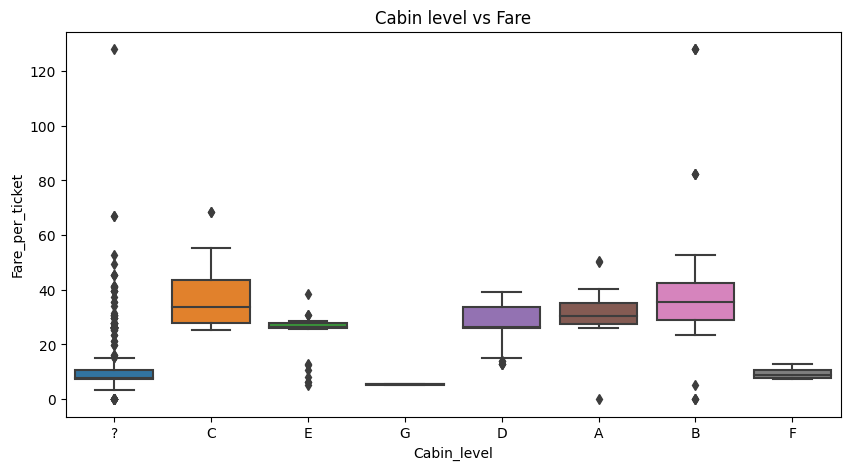

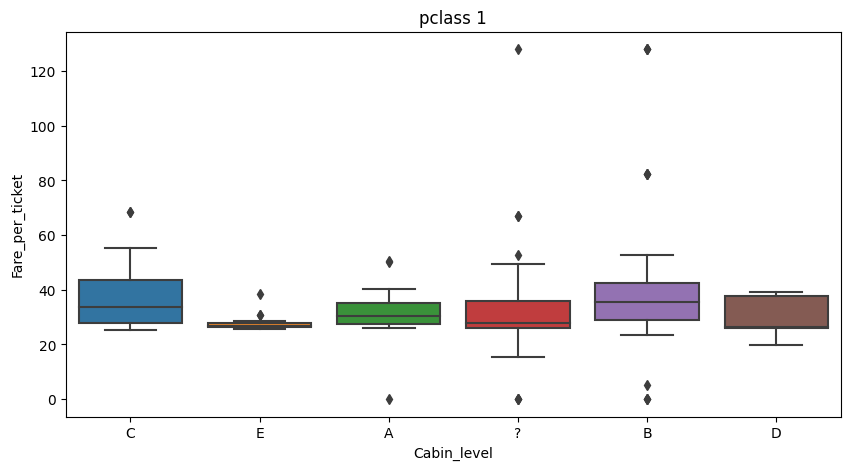

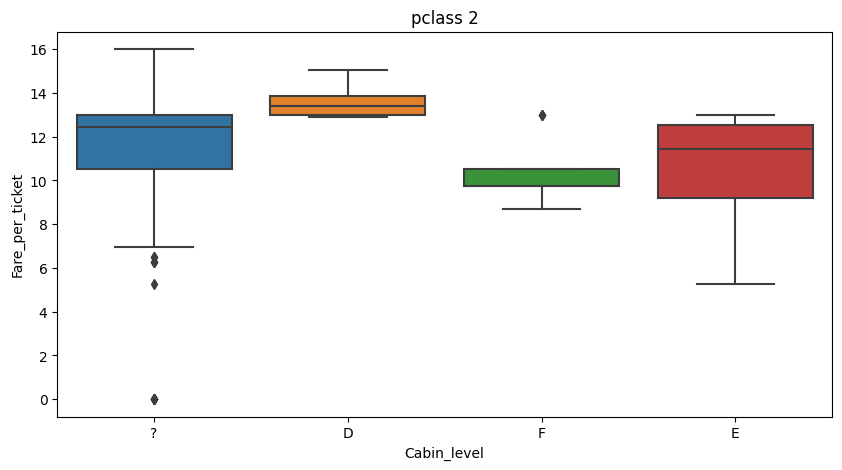

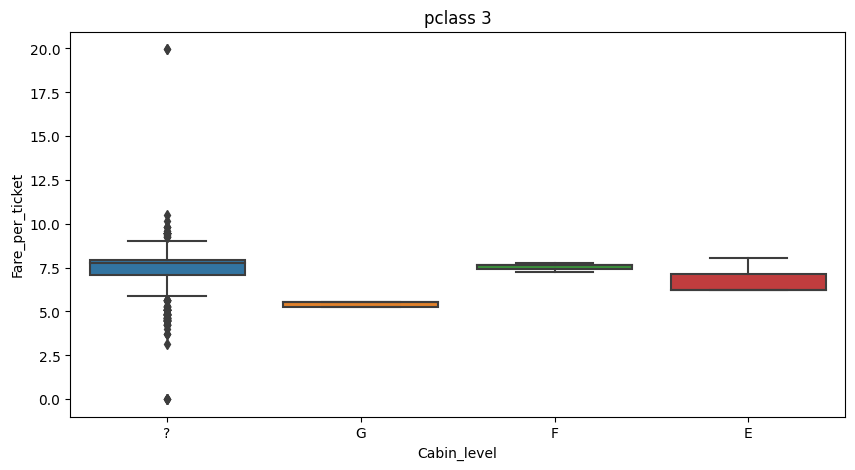

In [38]:
plt.figure(figsize=(10, 5))
plt.title('Cabin level vs Fare')
sns.boxplot(x='Cabin_level', y='Fare_per_ticket', data=combined_df)

plt.figure(figsize=(10, 5))
plt.title('pclass 1')
sns.boxplot(x='Cabin_level', y='Fare_per_ticket', data=combined_df[combined_df['Pclass'] == 1])

plt.figure(figsize=(10, 5))
plt.title('pclass 2')
sns.boxplot(x='Cabin_level', y='Fare_per_ticket', data=combined_df[combined_df['Pclass'] == 2])

plt.figure(figsize=(10, 5))
plt.title('pclass 3')
sns.boxplot(x='Cabin_level', y='Fare_per_ticket', data=combined_df[combined_df['Pclass'] == 3])

In [39]:

class3 = combined_df[combined_df['Pclass'] == 3]
class3_cabin_embark_fair = class3.groupby(['Cabin_level', 'Embarked'])['Fare_per_ticket'].median()

class3_cabin_embark_fair_min = class3.groupby(['Cabin_level', 'Embarked'])['Fare_per_ticket'].min()

class3_cabin_embark_fair_max = class3.groupby(['Cabin_level', 'Embarked'])['Fare_per_ticket'].max()

print(class3_cabin_embark_fair)
print(class3_cabin_embark_fair_min)
print(class3_cabin_embark_fair_max)

Cabin_level  Embarked
?            C           7.226400
             Q           7.750000
             S           7.854200
E            S           6.237500
F            C           7.229200
             Q           7.750000
             S           7.650000
G            S           5.566667
Name: Fare_per_ticket, dtype: float64
Cabin_level  Embarked
?            C           4.012500
             Q           4.854167
             S           0.000000
E            S           6.237500
F            C           7.229200
             Q           7.750000
             S           7.650000
G            S           5.231250
Name: Fare_per_ticket, dtype: float64
Cabin_level  Embarked
?            C            9.393750
             Q            8.458300
             S           19.966700
E            S            8.050000
F            C            7.452767
             Q            7.750000
             S            7.650000
G            S            5.566667
Name: Fare_per_ticket, dtype: floa

In [40]:
class2 = combined_df[combined_df['Pclass'] == 2]
class2_cabin_embark_fair = class2.groupby(['Cabin_level', 'Embarked'])['Fare_per_ticket'].median()

class2_cabin_embark_fair_min = class2.groupby(['Cabin_level', 'Embarked'])['Fare_per_ticket'].min()

class2_cabin_embark_fair_max = class2.groupby(['Cabin_level', 'Embarked'])['Fare_per_ticket'].max()

print(class2_cabin_embark_fair)
print(class2_cabin_embark_fair_min)
print(class2_cabin_embark_fair_max)


Cabin_level  Embarked
?            C           13.8583
             Q           12.3500
             S           12.5875
D            C           13.8271
             S           13.0000
E            Q           12.3500
             S           10.5000
F            S            9.7500
Name: Fare_per_ticket, dtype: float64
Cabin_level  Embarked
?            C           10.394800
             Q            9.687500
             S            0.000000
D            C           12.875000
             S           13.000000
E            Q           12.350000
             S            5.250000
F            S            8.666667
Name: Fare_per_ticket, dtype: float64
Cabin_level  Embarked
?            C           15.5792
             Q           12.3500
             S           16.0000
D            C           15.0458
             S           13.0000
E            Q           12.3500
             S           13.0000
F            S           13.0000
Name: Fare_per_ticket, dtype: float64


In [41]:
class1 = combined_df[combined_df['Pclass'] == 1]
class1_cabin_embark_fair = class1.groupby(['Cabin_level', 'Embarked'])['Fare_per_ticket'].median()

class1_cabin_embark_fair_min = class1.groupby(['Cabin_level', 'Embarked'])['Fare_per_ticket'].min()

class1_cabin_embark_fair_max = class1.groupby(['Cabin_level', 'Embarked'])['Fare_per_ticket'].max()


print(class1_cabin_embark_fair)
print(class1_cabin_embark_fair_min)
print(class1_cabin_embark_fair_max)

Cabin_level  Embarked
?            C           30.194800
             S           26.550000
A            C           31.000000
             S           27.286100
B            C           39.600000
             S           28.833333
C            C           35.475000
             Q           30.000000
             S           31.900000
D            C           37.625000
             S           26.277100
E            C           27.719433
             S           26.550000
Name: Fare_per_ticket, dtype: float64
Cabin_level  Embarked
?            C           15.500000
             S            0.000000
A            C           27.720800
             S            0.000000
B            C           27.720800
             S            0.000000
C            C           27.719433
             Q           30.000000
             S           25.258333
D            C           25.576400
             S           19.700000
E            C           26.900000
             S           25.587500
Name: Fa

### change data types to appropriate data types to be used in traning linear regression to predect the cabin level 

In [42]:
# one hot encode the embark 
combined_df = pd.get_dummies(combined_df, columns=['Embarked'])

In [43]:
combined_df['Cabin_level'].value_counts()

Cabin_level
?    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: count, dtype: int64

In [44]:
# label encoding the cabin level
combined_df['Cabin_level'] = combined_df['Cabin_level'].astype('category').cat.codes 

In [45]:
combined_df['Cabin_level'].value_counts()

Cabin_level
0    1015
3      94
2      65
4      46
5      41
1      22
6      21
7       5
Name: count, dtype: int64

In [46]:
combined_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_level,Title,age_group,Family_size,is_alone,No_Tickets,Fare_per_ticket,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,Mr,adult,2,0,1,7.250000,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,3,Mrs,adult,2,0,2,35.641650,True,False,False
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,Miss,adult,1,1,1,7.925000,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,3,Mrs,adult,2,0,2,26.550000,False,False,True
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,Mr,adult,1,1,1,8.050000,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,0,Mr,adult,1,1,1,8.050000,False,False,True
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,3,Noble,adult,1,1,3,36.300000,True,False,False
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,Mr,adult,1,1,1,7.250000,False,False,True
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,0,Mr,adult,1,1,1,8.050000,False,False,True


### predict the cabin level using Linear Regression using the features (Pclass, Embarked, Fare_per_ticket)

In [47]:
# predict the cabin level based on the pclass and embarked using linear regression

from sklearn.linear_model import LinearRegression

X = combined_df[combined_df['Cabin_level'] != 0][['Pclass', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Fare_per_ticket']]
y = combined_df[combined_df['Cabin_level'] != 0]['Cabin_level']

model = LinearRegression()

model.fit(X, y)

# Select the rows where Cabin_level is 0
X_pred = combined_df[combined_df['Cabin_level'] == 0][['Pclass', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Fare_per_ticket']]

# Predict the Cabin_level for these rows
y_pred = model.predict(X_pred)

# Update the Cabin_level in the dataframe
combined_df.loc[combined_df['Cabin_level'] == 0, 'Cabin_level'] = y_pred.round()

In [48]:
combined_df['Cabin_level'].value_counts()

Cabin_level
6    668
5    295
3    158
2     65
7     51
4     49
1     23
Name: count, dtype: int64

# change data type to start predicting survival 

In [49]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      1309 non-null   int64   
 1   Pclass           1309 non-null   int64   
 2   Name             1309 non-null   object  
 3   Sex              1309 non-null   object  
 4   Age              1309 non-null   float64 
 5   SibSp            1309 non-null   int64   
 6   Parch            1309 non-null   int64   
 7   Ticket           1309 non-null   object  
 8   Fare             1309 non-null   float64 
 9   Cabin_level      1309 non-null   int8    
 10  Title            1309 non-null   object  
 11  age_group        1309 non-null   category
 12  Family_size      1309 non-null   int64   
 13  is_alone         1309 non-null   int64   
 14  No_Tickets       1309 non-null   int64   
 15  Fare_per_ticket  1309 non-null   float64 
 16  Embarked_C       1309 non-null   bool    


In [50]:
# make the PassengerId the index
combined_df = combined_df.set_index('PassengerId')

# drop the name and ticket columns
combined_df = combined_df.drop(['Name', 'Ticket'], axis=1)

# one hot encoding
combined_df = pd.get_dummies(combined_df, columns=['age_group', 'Sex', 'Title'])

# round the fare per ticket and turn to int

combined_df['Fare_per_ticket'] = combined_df['Fare_per_ticket'].round().astype(int)



In [51]:
combined_df.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin_level,Family_size,is_alone,No_Tickets,Fare_per_ticket,...,age_group_adult,age_group_elderly,Sex_female,Sex_male,Title_Dr,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,6,2,0,1,7,...,True,False,False,True,False,False,True,False,False,False
2,1,38.0,1,0,71.2833,3,2,0,2,36,...,True,False,True,False,False,False,False,True,False,False
3,3,26.0,0,0,7.9250,6,1,1,1,8,...,True,False,True,False,False,True,False,False,False,False
4,1,35.0,1,0,53.1000,3,2,0,2,27,...,True,False,True,False,False,False,False,True,False,False
5,3,35.0,0,0,8.0500,6,1,1,1,8,...,True,False,False,True,False,False,True,False,False,False


# Cor map 

<Axes: >

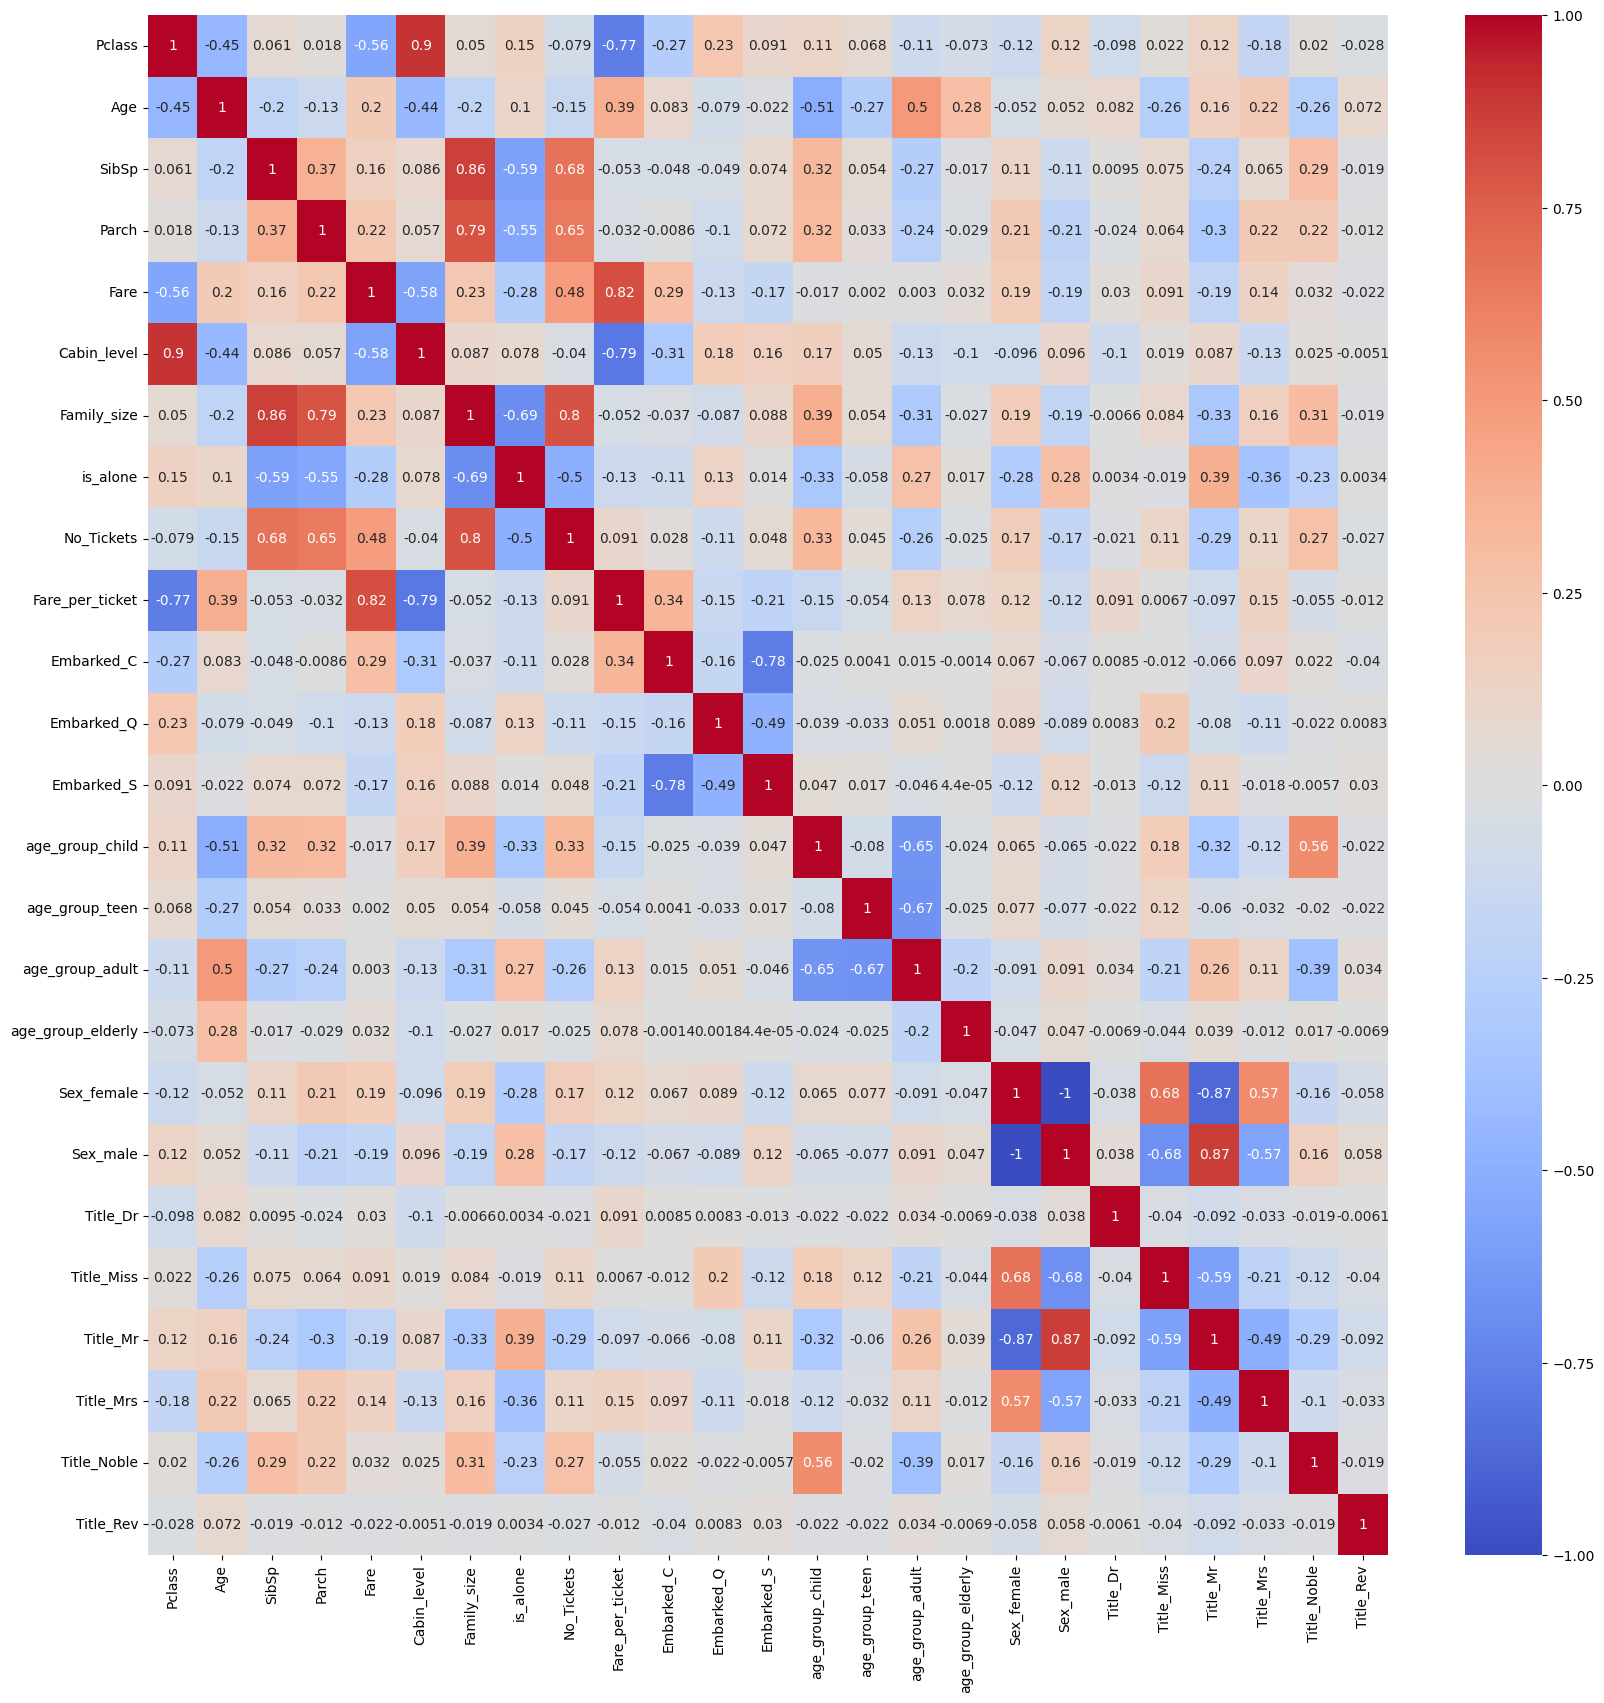

In [52]:
# creare a correlation matrix
import seaborn as sns


corr = combined_df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [53]:
# drop the highly correlated features 
combined_df = combined_df.drop(['Age', 'SibSp', 'Parch', 'Fare'], axis=1)

# create model

In [54]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [55]:
X = combined_df.loc[train_idx].values
y = Survived.values

scaler = MinMaxScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

In [57]:
rf.score(X_test, y_test)

0.8212290502793296

# Randomized search CV random forest

In [58]:
params = { 'criterion': ['gini', 'entropy'], 
    'n_estimators': [100, 200, 300, 400, 500], 
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]}

ran_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=params, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')
ran_search.fit(X_train, y_train)
ran_search.best_params_


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'n_estimators': 500,
 'min_samples_split': 6,
 'max_features': 'auto',
 'max_depth': 5,
 'criterion': 'entropy',
 'bootstrap': False}

In [59]:
rf = RandomForestClassifier(n_estimators=400, min_samples_split=3, max_features='sqrt', max_depth=4, criterion='gini', bootstrap=False, random_state=42).fit(X_train, y_train)

rf.score(X_test, y_test)

0.8212290502793296

In [60]:
test = combined_df.loc[test_idx].values
rf = RandomForestClassifier(n_estimators=400, min_samples_split=3, max_features='sqrt', max_depth=4, criterion='gini', bootstrap=False, random_state=42)
rf = rf.fit(X, y)

test_predictions = rf.predict(test)
test_df['Survived'] = test_predictions
test_df[['PassengerId', 'Survived']].to_csv('/kaggle/working/rf_submission_v3.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Gradient Boosting Decision Trees

In [61]:
from sklearn.ensemble import HistGradientBoostingClassifier

GBDT = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
GBDT.score(X_test, y_test)

0.8491620111731844

In [62]:
test = combined_df.loc[test_idx].values


GBDT = HistGradientBoostingClassifier(min_samples_leaf=50, max_leaf_nodes=36, max_iter=400, max_depth=8, learning_rate=0.01, l2_regularization=0.1, random_state=42)
GBDT = GBDT.fit(X, y)

test_predictions= GBDT.predict(test)
test_df['Survived'] = test_predictions
test_df[['PassengerId', 'Survived']].to_csv('/kaggle/working/GBDT_submission_v3.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Xgboost

In [63]:
import xgboost as xgb

xgboo = xgb.XGBClassifier(n_estimators=500, max_depth=100, learning_rate=0.1, subsample=0.5, enable_categorical=True)
xgboo.fit(X_train, y_train)

xgboo.score(X_test, y_test)


0.8435754189944135

In [64]:
params = { 'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
          'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
          'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
          'n_estimators': [100, 200, 300, 400, 500],
          'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
          'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
          'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}



xgbsearch = RandomizedSearchCV(xgb.XGBClassifier(random_state=42), param_distributions=params, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')
xgbsearch.fit(X_train, y_train)
xgbsearch.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'subsample': 0.8,
 'n_estimators': 400,
 'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.01,
 'gamma': 0.3,
 'colsample_bytree': 0.6}

In [66]:
test = combined_df.loc[test_idx].values



xgboo = xgb.XGBClassifier(n_estimators=200, max_depth=3, learning_rate=0.01, subsample=0.5, min_child_weight=2, gamma=0.5, colsample_bytree=0.8, random_state=42)
xgboo = xgboo.fit(X, y)

test_predictions= xgboo.predict(test)
test_df['Survived'] = test_predictions
test_df[['PassengerId', 'Survived']].to_csv('/kaggle/working/xgboo_submission_v3.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# LightGBM

In [67]:
from lightgbm import LGBMClassifier

# Initialize a LightGBM Classifier with 'auc' as the evaluation metric
gbm = LGBMClassifier(n_estimators=400, max_depth=3, learning_rate=0.01)

# Fit the model on the training data
gbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=400)

In [68]:
gbm.score(X_test, y_test)

0.8212290502793296

In [70]:
test = combined_df.loc[test_idx].values

gbm = LGBMClassifier(n_estimators=400, max_depth=3, learning_rate=0.01)
gbm.fit(X, y)

test_predictions= gbm.predict(test)
test_df['Survived'] = test_predictions
test_df[['PassengerId', 'Survived']].to_csv('/kaggle/working/gbm_submission_v3.csv', index=False)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 